<a href="https://colab.research.google.com/github/sandali17/CarPricePrediction-MachineLearning/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Basic Steps

#### 1.1 Importing the necessary libraries and the dataset

In [308]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [309]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (4).csv


#### 1.2 Loading the data in th dataframe

In [310]:
df = pd.read_csv("data.csv")
df.shape

(11914, 16)

In [311]:
#To display first five rows of the dataset

df.head

<bound method NDFrame.head of           Make       Model  Year  ... city mpg  Popularity   MSRP
0          BMW  1 Series M  2011  ...       19        3916  46135
1          BMW    1 Series  2011  ...       19        3916  40650
2          BMW    1 Series  2011  ...       20        3916  36350
3          BMW    1 Series  2011  ...       18        3916  29450
4          BMW    1 Series  2011  ...       18        3916  34500
...        ...         ...   ...  ...      ...         ...    ...
11909    Acura         ZDX  2012  ...       16         204  46120
11910    Acura         ZDX  2012  ...       16         204  56670
11911    Acura         ZDX  2012  ...       16         204  50620
11912    Acura         ZDX  2013  ...       16         204  50920
11913  Lincoln      Zephyr  2006  ...       17          61  28995

[11914 rows x 16 columns]>

In [312]:
#To display the columns of the dataset

df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### 1.3 Statistical Summary and data type of the data

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [314]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [315]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [316]:
# null values

df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Text(0.5, 0, 'MSRP')

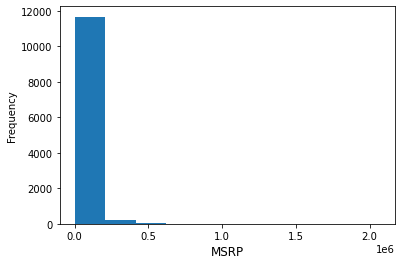

In [317]:
## target variable 

df['MSRP'].plot.hist()
plt.xlabel('MSRP', fontsize=12)

+ As the graph is right skewed graph, we will plot the graph without the outliers.

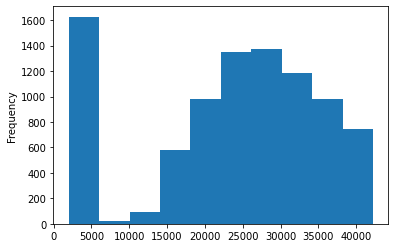

In [318]:
# Plotting without the outliers

(df['MSRP'].loc[df['MSRP']<4.223125e+04 ]).plot.hist()

Text(0.5, 0, 'Car Year')

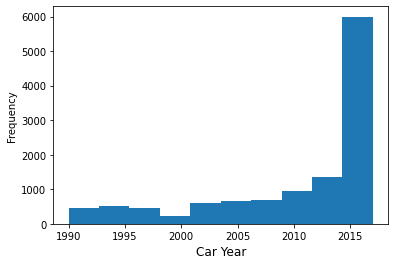

In [319]:
## Car year (Marketing)

df['Year'].plot.hist()
plt.xlabel('Car Year', fontsize=12)

+ The graph is left skewed graph, therefore we will plot the graph without the outliers.

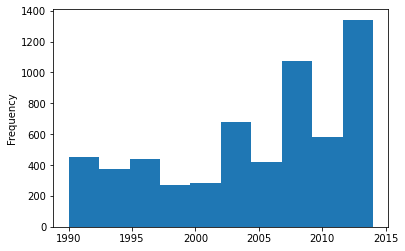

In [320]:
(df['Year'].loc[df['Year']<2015 ]).plot.hist()

Text(0.5, 0, 'Popularity of the Car')

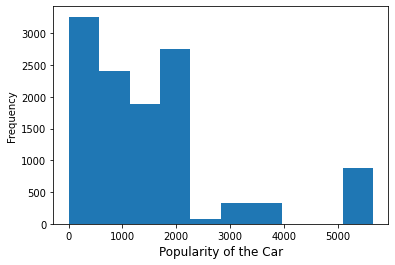

In [321]:
## Popularity of the car

df['Popularity'].plot.hist()
plt.xlabel('Popularity of the Car', fontsize=12)

### 2. Dropping irrelevant columns

In [322]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

+ Market Category has many null values, therefore we will drop this column, as it can manipulate our final result.
+ Any other column will be dropped once we will manipulate the data.

In [323]:
# Dropping the column named Market Category

df = df.drop(['Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### 3. Renaming the columns

In [324]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


### 4. Data Manipulation

##### 4.1 Dropping the duplicate rows

In [325]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (720, 15)


In [326]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [327]:
df.shape

(11194, 15)

##### 4.2 Missing or null values Manipulation

In [328]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [329]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

,data_type,null_count,unique_count
Make,object,0,48
Model,object,0,915
Year,int64,0,28
Engine Fuel Type,object,3,10
HP,float64,69,356
Cylinders,float64,30,9
Transmission,object,0,5
Drive Mode,object,0,4
Number of Doors,float64,6,3
Vehicle Size,object,0,3


In [330]:
#for Cylinders

df['Cylinders'].value_counts()

4.0     4361
6.0     4288
8.0     1964
12.0     228
5.0      169
10.0      65
0.0       56
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [331]:
df['Cylinders'].mode()

0    4.0
dtype: float64

In [332]:
# Replacing null values with the mode of Cylinders column

df['Cylinders'].fillna(value = (df['Cylinders'].mode()[0]), inplace=True)

In [333]:
# for Number of doors

df['Number of Doors'].value_counts()

4.0    7956
2.0    2876
3.0     356
Name: Number of Doors, dtype: int64

In [334]:
df['Number of Doors'].mode()

0    4.0
dtype: float64

In [335]:
# Replacing null values with the mode of Number of Doors column

df['Number of Doors'].fillna(value = (df['Number of Doors'].mode()[0]), inplace=True)
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders            0
Transmission         0
Drive Mode           0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

+ HP has 69 missing values and 356 unique values, therefore we will drop the rows with null values in this column.

In [336]:
df = df.dropna()    # Dropping the missing values.
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [337]:
df.count()

Make                11122
Model               11122
Year                11122
Engine Fuel Type    11122
HP                  11122
Cylinders           11122
Transmission        11122
Drive Mode          11122
Number of Doors     11122
Vehicle Size        11122
Vehicle Style       11122
MPG-H               11122
MPG-C               11122
Popularity          11122
Price               11122
dtype: int64

In [338]:
#changing the datatype

df = df.astype({'HP': 'int', 'Cylinders': 'int', 'Number of Doors': 'int'})

In [339]:
df.dtypes

Make                object
Model               object
Year                 int64
Engine Fuel Type    object
HP                   int64
Cylinders            int64
Transmission        object
Drive Mode          object
Number of Doors      int64
Vehicle Size        object
Vehicle Style       object
MPG-H                int64
MPG-C                int64
Popularity           int64
Price                int64
dtype: object

### 5. Detecting Outliers

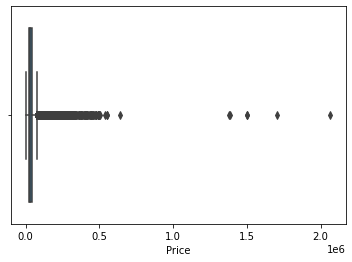

In [340]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=df['Price'])

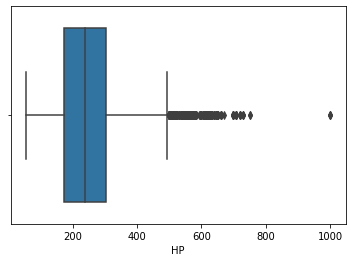

In [341]:
sns.boxplot(x=df['HP'])

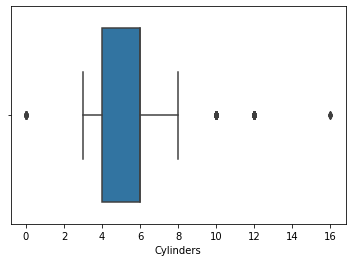

In [342]:
sns.boxplot(x=df['Cylinders'])

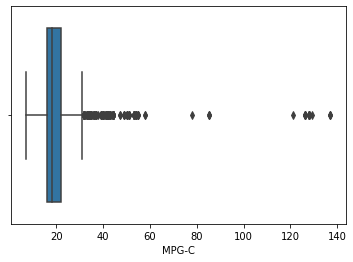

In [343]:
sns.boxplot(x=df['MPG-C'])

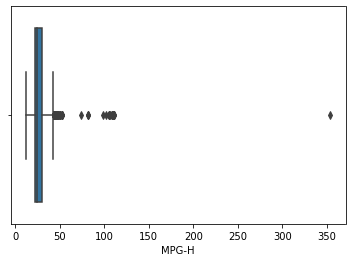

In [344]:
sns.boxplot(x=df['MPG-H'])

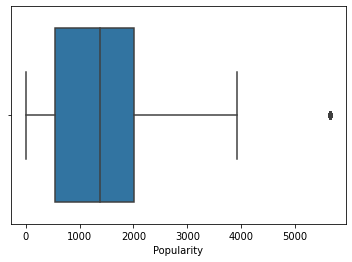

In [345]:
sns.boxplot(x=df['Popularity'])

In [346]:
#Finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.00
HP                   131.00
Cylinders              2.00
Number of Doors        2.00
MPG-H                  8.00
MPG-C                  6.00
Popularity          1460.00
Price              21403.75
dtype: float64


In [347]:
#Removing Outliners
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

### 6. Most represented car brands

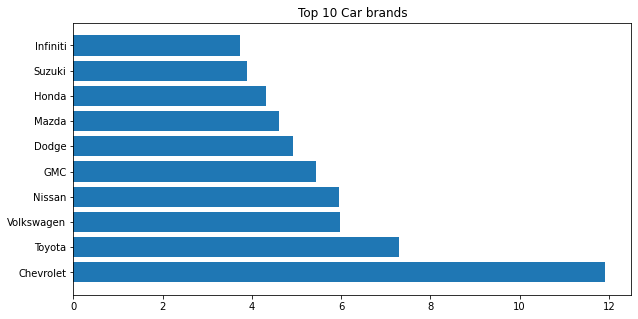

In [348]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

##### 6.1 Average price of these car brands

In [349]:
print('Average prices are: ')
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

Average prices are: 
                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


### 7. Correlation Matrix

In [350]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329976,-0.093524,0.242256,0.360163,0.324304,0.205050,0.592276
HP,0.329976,1.000000,0.740270,0.045206,-0.464950,-0.562761,0.105713,0.742896
Cylinders,-0.093524,0.740270,1.000000,0.024026,-0.695152,-0.747703,0.027194,0.391687
Number of Doors,0.242256,0.045206,0.024026,1.000000,0.004105,0.021064,-0.073912,0.133099
MPG-H,0.360163,-0.464950,-0.695152,0.004105,1.000000,0.938009,0.082042,-0.127151
MPG-C,0.324304,-0.562761,-0.747703,0.021064,0.938009,1.000000,0.071653,-0.201473
Popularity,0.205050,0.105713,0.027194,-0.073912,0.082042,0.071653,1.000000,0.116886
Price,0.592276,0.742896,0.391687,0.133099,-0.127151,-0.201473,0.116886,1.000000


##### High correlation between
+ HP and Cylinders: The more cylinders there are, the more powerful the car is.
+ HP and Price: The more powerful the car is, the more costly it is.
+ MPG-H and MPG-C

##### High anticorrelation between
+ Cylinders and MPG-H: Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

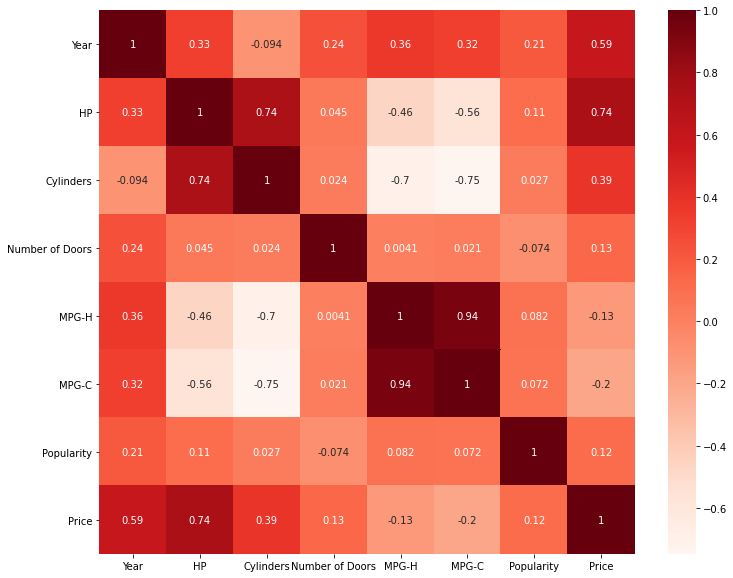

In [351]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [352]:
#Correlation with target variable
cor_target = abs(cor["Price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Year     0.592276
HP       0.742896
Price    1.000000
Name: Price, dtype: float64

### 8. EDA and Graph plots

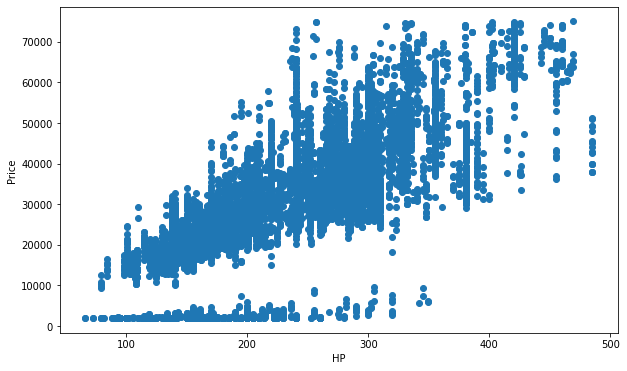

In [353]:
#Scatterplot between highly correlated features

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

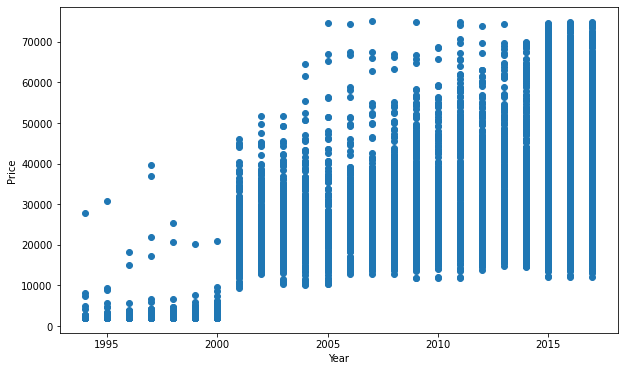

In [354]:
#Scatterplot between highly correlated features

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Year'], df['Price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')
plt.show()

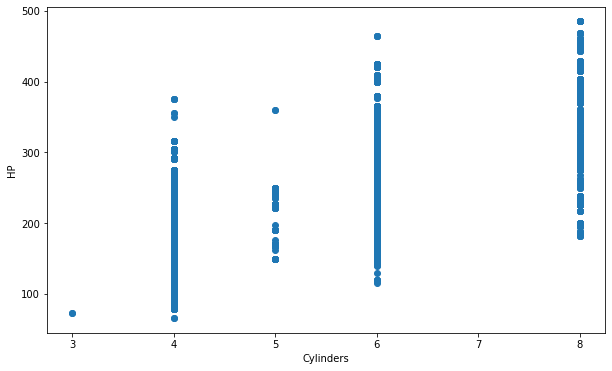

In [355]:
#Scatterplot between highly correlated features

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['HP'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('HP')
plt.show()

##### With all the above graphs, EDA generated is
+ Price of the car is dependent mostly on the engine house power and the car year.
+ The car with more cylinders is more powerful.
+ Car price increased after year 2000.
+ More the no the cylinders, more is the price.
+ For MPG-H 13, price is maximum and for MPG-H 15, price is lowest.
+ For MPG-C 10, price is maximum and for MPG-C 31, price is minimum.

### 9. Splitting of the dataset

In [356]:
df = df.drop(['Make', 'Model'], axis=1)

In [357]:
# One-hot encode the data using pandas get_dummies

df = pd.get_dummies(df)

In [358]:
x = df.drop('Price', axis=1)
y= df['Price']

In [359]:
# train and test split of the data into 80 and 20 ratio

from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size = 0.2, random_state = 2)

train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((6900, 42), (1725, 42), (6900,), (1725,))

### 10. Performance check of different algorithms over metrics like R- Squared, RMSE, MSE, and MAE.

##### 10.1 Linear Regression Model

In [432]:
# Importing the necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [433]:
# Fitting the model

lreg = LinearRegression()
lreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [434]:
pred_train = lreg.predict(train_x)

In [435]:
pred_test = lreg.predict(valid_x)

##### Performance Check

In [436]:
mse=mean_squared_error(valid_y,pred_test)
rmse=np.sqrt(mean_squared_error(valid_y,pred_test))
r2score=r2_score(valid_y,pred_test)
mae=mean_absolute_error(valid_y,pred_test)

In [437]:
print('mse= ',mse)
print('rmse= ',rmse)
print('r2_score= ',r2score)
print('mae= ',mae )

mse=  47304025.54809016
rmse=  6877.792200124264
r2_score=  0.7942290608114118
mae=  5222.444477014023


+ This model performs good as its R- Squared Score is 0.7942 that is elucidation of 79.42%

##### 10.2 Decision Trees Regression

In [366]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [405]:
#creating the decision tree function
dt_model = DecisionTreeRegressor(random_state=10, max_depth=12)

In [406]:
#fitting the model
dt_model.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=12,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [407]:
# Training Score

dt_model.score(train_x, train_y)

0.9581296599083227

In [408]:
#checking the validation score

dt_model.score(valid_x, valid_y)

0.9393212050219234

In [409]:
dt_model.predict(valid_x)

array([67610.86206897, 57868.94736842,  2000.01724138, ...,
       32308.3125    ,  3665.        , 33508.325     ])

In [410]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,20):
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=10)
    dt_model.fit(train_x, train_y)
    train_accuracy.append(dt_model.score(train_x, train_y))
    validation_accuracy.append(dt_model.score(valid_x, valid_y))

In [411]:
frame = pd.DataFrame({'max_depth':range(1,20), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.430830,0.430289
1,2,0.643861,0.643639
2,3,0.740163,0.740963
3,4,0.783199,0.784688
4,5,0.811825,0.813441


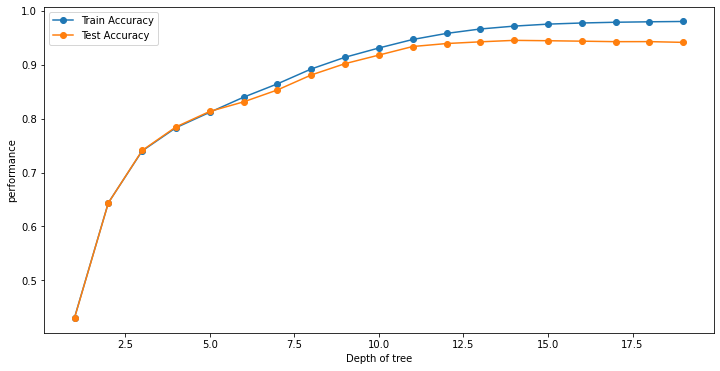

In [412]:
#Plotting graph for Depth of tree
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o', label='Train Accuracy')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o', label='Test Accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(loc='upper left')

In [413]:
pred_y=dt_model.predict(valid_x)

##### Performance Check

In [414]:
mse=mean_squared_error(valid_y,pred_y)
rmse=np.sqrt(mean_squared_error(valid_y,pred_y))
r2score=r2_score(valid_y,pred_y)
mae=mean_absolute_error(valid_y,pred_y)

In [415]:
print('mse= ',mse)
print('rmse= ',rmse)
print('r2_score= ',r2score)
print('mae= ',mae)

mse=  13450541.260114443
msle=  0.012168538449426898
rmse=  3667.4979563885845
r2_score=  0.9414905924893247
mae=  2618.2016204301876


+ Decision tress model give the R- Squared Score of 0.9415, that is elucidation of 94.14%.

##### 10.3 Random Forests Regression

In [480]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 5, max_depth=25) 
  
# fit the regressor with x and y data 
regressor.fit(valid_x, valid_y) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=5, verbose=0, warm_start=False)

In [481]:
y_pred=regressor.predict(valid_x)

In [482]:
# checking the training score

dt_model.score(train_x, train_y)

0.9802736743781502

In [483]:
# checking the validity score

dt_model.score(valid_x, valid_y)

0.9414905924893247

##### Performance Check

In [484]:
mse=mean_squared_error(valid_y,y_pred)
rmse=np.sqrt(mean_squared_error(valid_y,y_pred))
r2score=r2_score(valid_y,y_pred)
mae=mean_absolute_error(valid_y,y_pred)

In [485]:
print('mse= ',mse)
print('rmse= ',rmse)
print('r2_score= ',r2score)
print('mae= ',mae)

mse=  4297648.217763133
rmse=  2073.0769927243737
r2_score=  0.9813053730665637
mae=  1371.9306007478192


+ This model works similarly like Linear Regression model by giving the R- Squared Score of 0.9813, elucidation of 98.13%.

## With the above comparisons, we find that:
+ Random Forests Regression model is giving the best results with the R- Squared Score of 98.13% when converted to percentage.
+ It is also giving the least RMSE value with 2073.08.


+ Decision Trees Regression Model also gives good results with the R- Squared Score of 94.14%, when converted to percentage.


+ Linear Regression model is showing the lowest R- Squared Score with 79.42%, when converted to percentage.